# Import necessary libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Covid-11-13-2022.csv'
data = pd.read_csv(file_path)

## Step 1: Data Cleaning

In [10]:
# Drop columns that are mostly empty (FIPS, Admin2, Province_State, Recovered, Active)
cleaned_data = data.drop(columns=['FIPS', 'Admin2', 'Province_State', 'Recovered', 'Active'])

In [11]:
# Fill missing values in 'Confirmed' and 'Deaths' columns with 0 (assuming missing means no cases or no data)
cleaned_data['Confirmed'].fillna(0, inplace=True)
cleaned_data['Deaths'].fillna(0, inplace=True)

In [12]:
# Drop any remaining rows with missing important data (Combined_Key or Country_Region)
cleaned_data.dropna(subset=['Country_Region', 'Combined_Key'], inplace=True)

## Step 2: Basic Data Analysis

In [13]:
# Total confirmed cases worldwide
total_confirmed = cleaned_data['Confirmed'].sum()
# Total deaths worldwide
total_deaths = cleaned_data['Deaths'].sum()

print(f"Total Confirmed Cases Worldwide: {total_confirmed}")
print(f"Total Deaths Worldwide: {total_deaths}")

Total Confirmed Cases Worldwide: 635495921
Total Deaths Worldwide: 6611794


In [14]:
# Top 10 countries with the most confirmed cases
top_10_confirmed = cleaned_data[['Country_Region', 'Confirmed']].groupby('Country_Region').sum().sort_values(by='Confirmed', ascending=False).head(10)
print("\nTop 10 Countries by Confirmed Cases:")
print(top_10_confirmed)


Top 10 Countries by Confirmed Cases:
                Confirmed
Country_Region           
US               97994731
India            44666924
France           37288432
Germany          36005025
Brazil           34908198
Korea, South     26217994
United Kingdom   24179656
Italy            23823192
Japan            23203855
Russia           21194442


## Step 3: Visualization

<Figure size 1000x600 with 0 Axes>

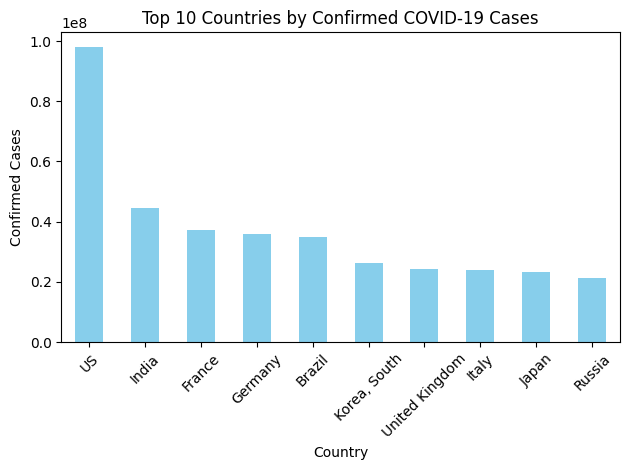

In [15]:
# Plotting total confirmed cases for the top 10 countries
plt.figure(figsize=(10, 6))
top_10_confirmed.plot(kind='bar', color='skyblue', legend=False)
plt.title('Top 10 Countries by Confirmed COVID-19 Cases')
plt.ylabel('Confirmed Cases')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

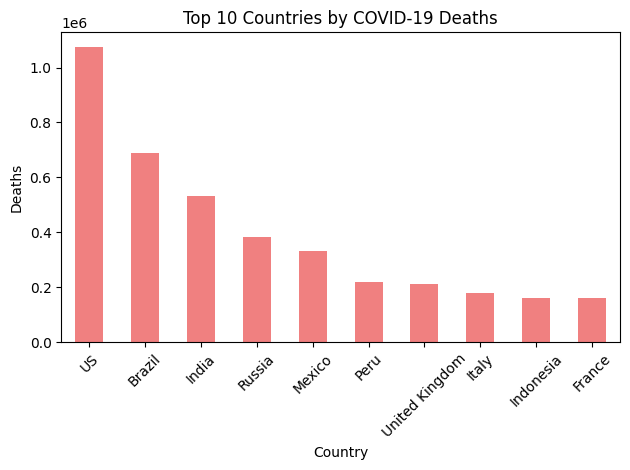

In [16]:
# Plotting total deaths for the top 10 countries
top_10_deaths = cleaned_data[['Country_Region', 'Deaths']].groupby('Country_Region').sum().sort_values(by='Deaths', ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_10_deaths.plot(kind='bar', color='lightcoral', legend=False)
plt.title('Top 10 Countries by COVID-19 Deaths')
plt.ylabel('Deaths')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
